## Three Observable Trends
* Quite obviously it should go without saying but it is hard to ignore; the data shows that the maximum temperature of a city rises the closer it is located to the equator and falls the further it is located from the equator. There is a strong negative correlation between max temperature and latitude in the northern hemisphere, and a slightly less signifcant positive correlation between the two in the southern hemisphere.

* There doesn't seem to be a meaningful correlation bewtween windspeed and the latitude of a city in either of the hemispheres. The southern hemisphere shows a slight negative correlation.

* Whether northern or southern, either hemisphere has about the same exact positive correlation between humidity and latitude. 

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy as st
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [87]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [88]:
#Create empty lists to hold relevant data

city_name = []
cloudiness = []
country_code = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []



In [89]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#response = requests.get(f"{base_url}appid={api_key}&units={units}&q="+city).json()
#print(json.dumps(response, indent=4, sort_keys=True))
#print(response["name"])


# iterate through the cities list
for city in cities:
    try:
        response = requests.get(f"{base_url}appid={api_key}&units={units}&q="+city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country_code.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing weather data for {city}")
        
        
    except (KeyError, IndexError):
        print("Missing city... skipping.")
        
        #Appending null values so arrays are all the same length (can drop null values later)
        
        city_name.append(None)
        cloudiness.append(None)
        country_code.append(None)
        date.append(None)
        humidity.append(None)
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        wind_speed.append(None)
        pass

print("Processing COMPLETED")
    
   





Processing weather data for ponta do sol
Processing weather data for bathsheba
Processing weather data for dikson
Missing city... skipping.
Processing weather data for penzance
Processing weather data for adrar
Processing weather data for sitka
Processing weather data for bluff
Processing weather data for ushuaia
Processing weather data for chicama
Processing weather data for cherskiy
Processing weather data for saldanha
Processing weather data for elat
Processing weather data for mount isa
Processing weather data for albany
Processing weather data for gotsu
Processing weather data for parana
Processing weather data for swellendam
Processing weather data for awbari
Processing weather data for puerto ayora
Processing weather data for castro
Processing weather data for kodiak
Processing weather data for lata
Processing weather data for upernavik
Processing weather data for mataura
Processing weather data for thompson
Processing weather data for lixourion
Processing weather data for talga

Processing weather data for port hedland
Processing weather data for talara
Processing weather data for kieta
Processing weather data for acapulco
Missing city... skipping.
Processing weather data for anadyr
Processing weather data for nanortalik
Processing weather data for rio grande
Processing weather data for byron bay
Processing weather data for peterhead
Missing city... skipping.
Processing weather data for leningradskiy
Processing weather data for santa cruz
Processing weather data for pierre
Processing weather data for oistins
Processing weather data for vila velha
Processing weather data for itarema
Processing weather data for tabou
Processing weather data for nyuksenitsa
Processing weather data for breytovo
Processing weather data for san quintin
Missing city... skipping.
Processing weather data for yar-sale
Processing weather data for nantucket
Processing weather data for cartagena
Processing weather data for russell
Processing weather data for tingi
Processing weather data f

Processing weather data for benghazi
Processing weather data for namatanai
Processing weather data for gizo
Processing weather data for barentu
Processing weather data for palmer
Processing weather data for jardim
Processing weather data for maniitsoq
Processing weather data for kutum
Processing weather data for alihe
Processing weather data for mehamn
Processing weather data for torbat-e jam
Processing weather data for uray
Processing weather data for saint anthony
Processing weather data for baiao
Processing weather data for nyurba
Processing weather data for srednekolymsk
Processing weather data for port hardy
Processing weather data for sioux lookout
Processing weather data for isla mujeres
Processing weather data for zenzeli
Missing city... skipping.
Processing weather data for puerto madryn
Processing weather data for zavetnyy
Processing weather data for sept-iles
Processing weather data for gela
Processing weather data for wanning
Processing weather data for suez
Processing weat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [154]:
city_wx_df = pd.DataFrame({"City": city_name,
                           "Cloudiness": cloudiness,
                           "Country Code": country_code,
                           "Date": date,
                           "Humidity": humidity,
                           "Latitude": lat,
                           "Longitude": lng,
                           "Max Temp": max_temp,
                           "Wind Speed": wind_speed})

city_wx_df

,City,Cloudiness,Country Code,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ponta do Sol,20.0,PT,1.607904e+09,82.0,32.67,-17.10,62.60,4.70
1,Bathsheba,20.0,BB,1.607904e+09,83.0,13.22,-59.52,78.80,6.93
2,Dikson,100.0,RU,1.607904e+09,92.0,73.51,80.55,-2.51,14.23
3,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,Penzance,83.0,GB,1.607904e+09,87.0,50.12,-5.54,51.80,26.40
...,...,...,...,...,...,...,...,...,...
602,Talcahuano,0.0,CL,1.607904e+09,59.0,-36.72,-73.12,62.60,16.11
603,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
604,Hirado,75.0,JP,1.607904e+09,60.0,33.36,129.55,42.80,20.80
605,Quthing,54.0,LS,1.607904e+09,65.0,-30.40,27.70,60.42,1.90


In [155]:
#droppig null values and resetting the index to account for missing cities
city_wx_df = city_wx_df.dropna()
city_wx_df = city_wx_df.reset_index(drop=True)
city_wx_df

,City,Cloudiness,Country Code,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ponta do Sol,20.0,PT,1.607904e+09,82.0,32.67,-17.10,62.60,4.70
1,Bathsheba,20.0,BB,1.607904e+09,83.0,13.22,-59.52,78.80,6.93
2,Dikson,100.0,RU,1.607904e+09,92.0,73.51,80.55,-2.51,14.23
3,Penzance,83.0,GB,1.607904e+09,87.0,50.12,-5.54,51.80,26.40
4,Adrar,90.0,MR,1.607904e+09,27.0,20.50,-10.07,64.13,7.11
...,...,...,...,...,...,...,...,...,...
553,Lagoa,25.0,PT,1.607904e+09,64.0,39.05,-27.98,57.83,26.66
554,Talcahuano,0.0,CL,1.607904e+09,59.0,-36.72,-73.12,62.60,16.11
555,Hirado,75.0,JP,1.607904e+09,60.0,33.36,129.55,42.80,20.80
556,Quthing,54.0,LS,1.607904e+09,65.0,-30.40,27.70,60.42,1.90


In [280]:
#Export csv

city_wx_df.to_csv("city_wx.csv", index=False)

In [281]:
#Looking for cities with humidity over 100 (None exist in this df)

humidity_over_100 = city_wx_df.loc[city_wx_df["Humidity"] > 100]

humidity_over_100

,City,Cloudiness,Country Code,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.



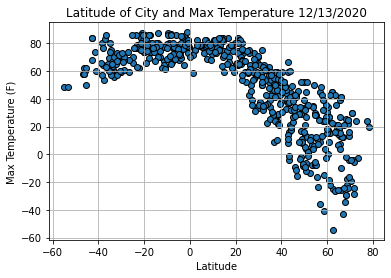

In [347]:
#Lat v. Temp. Scatter Plot

plt.scatter(city_wx_df["Latitude"], city_wx_df["Max Temp"],  
            marker="o", edgecolors="black")
plt.title("Latitude of City and Max Temperature 12/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/lat_v_max_temp.png")

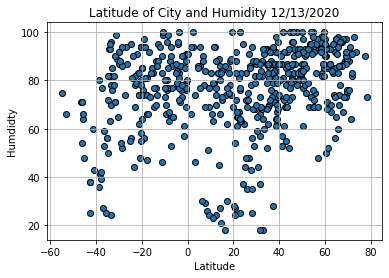

In [348]:
#Lat v. Humidity Scatter Plot

plt.scatter(city_wx_df["Latitude"], city_wx_df["Humidity"], marker="o", edgecolors="black")
plt.title("Latitude of City and Humidity 12/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Humdidty")
plt.grid()
plt.savefig("../Images/lat_v_humidity.png")


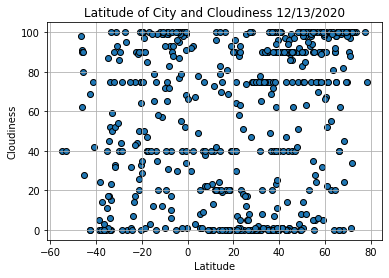

In [349]:
#Lat v. Cloudiness Scatter Plot

plt.scatter(city_wx_df["Latitude"], city_wx_df["Cloudiness"], marker="o", edgecolors="black")
plt.title("Latitude of City and Cloudiness 12/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../Images/lat_v_clouds.png")

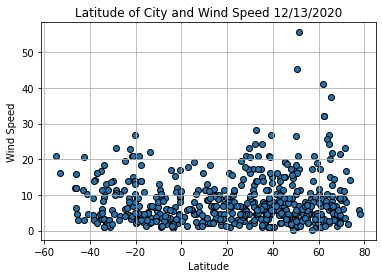

In [350]:
#Lat v. Wind Speed

plt.scatter(city_wx_df["Latitude"], city_wx_df["Wind Speed"], marker="o", edgecolors="black")
plt.title("Latitude of City and Wind Speed 12/13/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("../Images/lat_v_wind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [368]:
north = city_wx_df.loc[city_wx_df["Latitude"] > 0]
south = city_wx_df.loc[city_wx_df["Latitude"] < 0]

x_values = north["Latitude"]
y_values = north["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"rvalue: {rvalue}")
print(f"pvalue: {pvalue}")
print(f"stderr: {stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope: -1.3181883051503753
intercept: 91.65739725750143
rvalue: -0.8150478503590007
pvalue: 4.782496098224269e-93
stderr: 0.04781921769118033
y = -1.32x + 91.66


The r-squared is: 0.6643029983748281


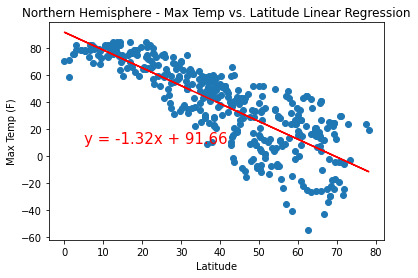

In [369]:
plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (5, 10), fontsize=15, color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/No_Hem_Max_Temp_Lat.png")

There is a negative correlation between max temperature and longitute in the northern hemisphere. 

In [393]:
#Rather than copy and paste and change values above will attempt the function for the rest of the assignment below

def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    print(f"The r-squared is: {rvalue**2}")
    return line_eq

def chart_annotation(line_eq, int1, int2,):
    plt.annotate(line_eq, (int1, int2), fontsize=12, color="red")

def chart_titles(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    




    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3003792175815789


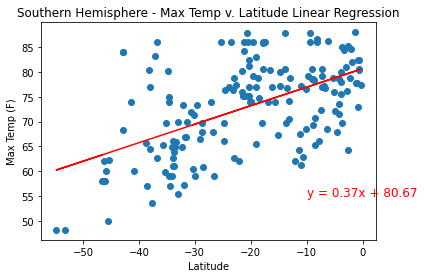

In [394]:
x_value = south["Latitude"]
y_value = south["Max Temp"]

eq = linear_regression(south["Latitude"], south["Max Temp"])
chart_annotation(eq, -10,55)
chart_titles("Southern Hemisphere - Max Temp v. Latitude Linear Regression", "Latitude", "Max Temp (F)")
plt.savefig("../Images/So_Hem_Max_Temp_Lat.png")




There is a positive correlation between max temperature and latitude in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12420620826864781


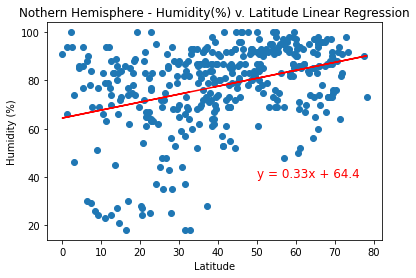

In [395]:
x_value = north["Latitude"]
y_value = north["Humidity"]
eq = linear_regression(x_value, y_value)
chart_annotation(eq, 50,40)
chart_titles("Nothern Hemisphere - Humidity(%) v. Latitude Linear Regression", "Latitude", "Humidity (%)")
plt.savefig("../Images/No_Hem_Hum_Lat.png")


There is a small positive correlation between humidity and latitude in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13668490596369495


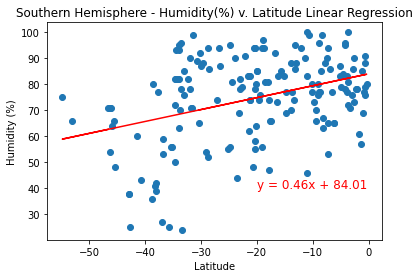

In [396]:
x_value = south["Latitude"]
y_value = south["Humidity"]
eq = linear_regression(x_value, y_value)
chart_annotation(eq, -20,40)
chart_titles("Southern Hemisphere - Humidity(%) v. Latitude Linear Regression", "Latitude", "Humidity (%)")
plt.savefig("../Images/So_Hem_Hum_Lat.png")


There is a positive correlation between humidity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1616860837304922


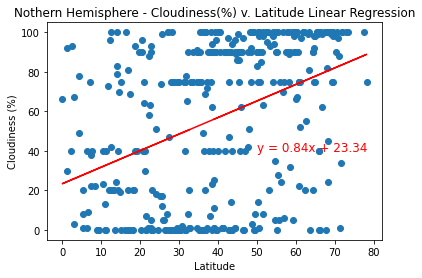

In [397]:
x_value = north["Latitude"]
y_value = north["Cloudiness"]
eq = linear_regression(x_value, y_value)
chart_annotation(eq, 50,40)
chart_titles("Nothern Hemisphere - Cloudiness(%) v. Latitude Linear Regression", "Latitude", "Cloudiness (%)")
plt.savefig("../Images/No_Hem_Clouds_Lat.png")


There is a strong positive correlation between cloudiness and latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09447206640129797


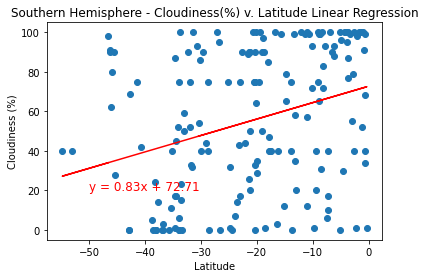

In [398]:
x_value = south["Latitude"]
y_value = south["Cloudiness"]
eq = linear_regression(x_value, y_value)
chart_annotation(eq, -50,20)
chart_titles("Southern Hemisphere - Cloudiness(%) v. Latitude Linear Regression", \
             "Latitude", "Cloudiness (%)")
plt.savefig("../Images/So_Hem_Clouds_Lat.png")


There is a positive correlation between cloudiness and latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012663814271548219


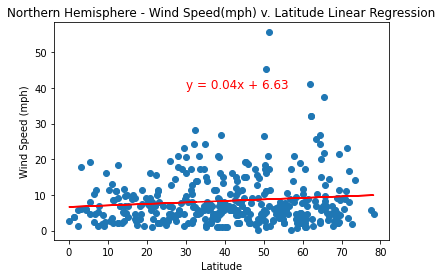

In [399]:
x_value = north["Latitude"]
y_value = north["Wind Speed"]
eq = linear_regression(x_value, y_value)
chart_annotation(eq, 30,40)
chart_titles("Northern Hemisphere - Wind Speed(mph) v. Latitude Linear Regression", "Latitude", "Wind Speed (mph)")
plt.savefig("../Images/No_Hem_Wind_Lat.png")


There is an incredibly slight/small positive correlation beteween windspeed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04913477327847493


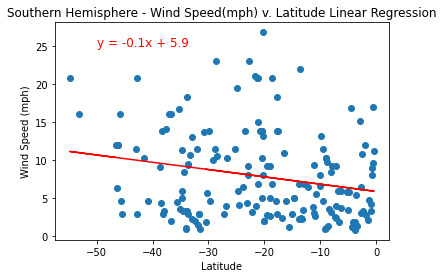

In [400]:
x_value = south["Latitude"]
y_value = south["Wind Speed"]
eq = linear_regression(x_value, y_value)
chart_annotation(eq, -50,25)
chart_titles("Southern Hemisphere - Wind Speed(mph) v. Latitude Linear Regression", "Latitude", "Wind Speed (mph)")
plt.savefig("../Images/So_Hem_Wind_Lat.png")


There is a slight negative correlation in the southern hemisphere between wind speed and latitude